In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from dateutil.relativedelta import relativedelta


In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [29]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
recentdate = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recentdate



('2017-08-23',)

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recentdate = dt.date(2017, 8, 23) + relativedelta(months=-12)
# Calculate the date one year from the last date in data set.
year_from_lastdate = recentdate - dt.timedelta(days = 365)

print(year_from_lastdate)


# Perform a query to retrieve the data and precipitation scores
date_prcp = Session.query(Measurement.date,func.avg(Measurement.prcp)).\
    filter(Measurement.date>=recentdate).\
    group_by(Measurement.date).all()





2015-08-24


In [32]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_prcp, columns = ['date', 'prcp'])
df.date = pd.to_datetime(df.date)

df.set_index('date', inplace =True)
#df.head()

# Sort the dataframe by date
df.sort_values('date')


,prcp
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


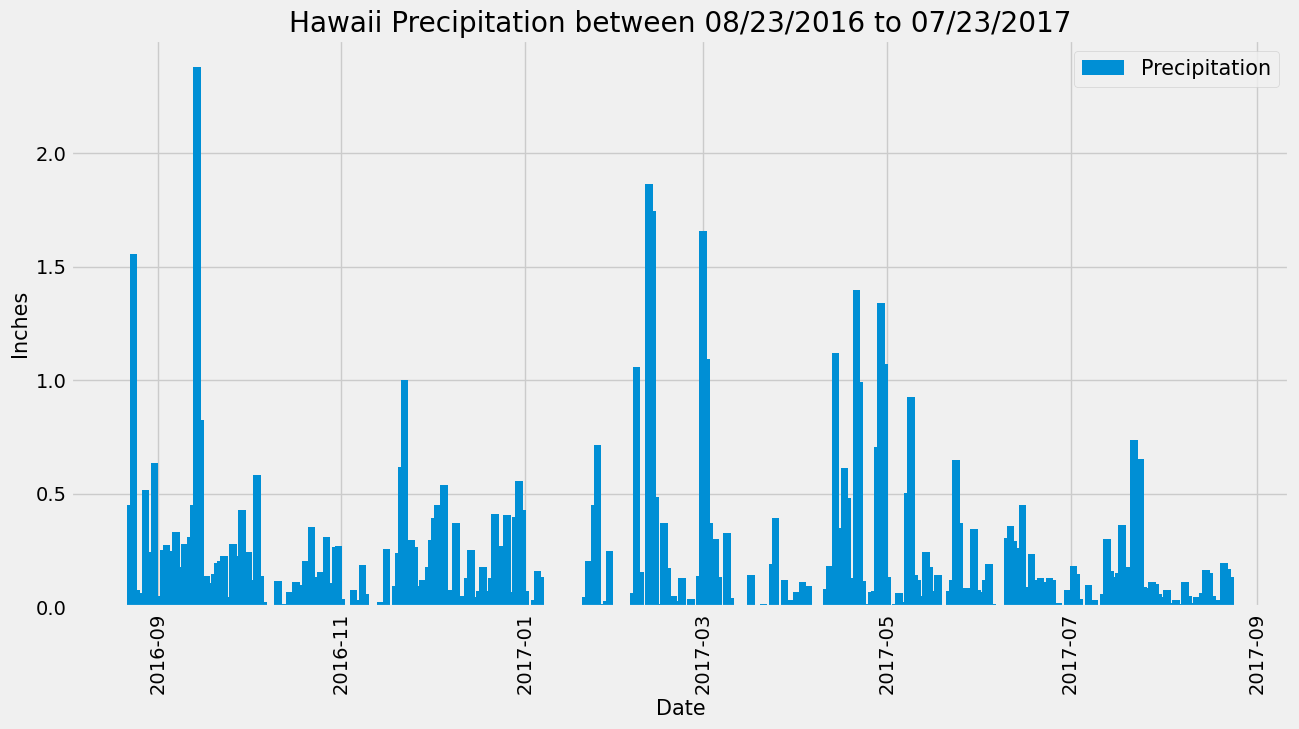

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(14, 7))

plt.bar(df.index,df['prcp'],width=2.5)
plt.xticks(rotation=90)
plt.title('Hawaii Precipitation between 08/23/2016 to 07/23/2017')
plt.xlabel('Date',fontsize =15)
plt.ylabel('Inches', fontsize =15)
plt.xticks(rotation=90)
plt.legend(['Precipitation'],fontsize =15)

plt.show()

In [34]:
fig.savefig('Resources/Bar1.png')


In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
stations = [(Session.query(func.count(Station.station)).scalar())]

stations

[9]

In [37]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = Session.query(Station.station,func.count(Station.station)).\
    filter(Station.station == Measurement.station).\
    group_by(Station.station).order_by(func.count(Station.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = Session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                      func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281' ).all()

print( temp)


[(54.0, 85.0, 71.66378066378067)]


In [39]:
last12months = Session.query(Measurement.date, Measurement.tobs).filter_by(station = "USC00519281").\
    filter(Measurement.date >= year_from_lastdate).all()
last12months
df_results=pd.DataFrame(last12months)
df_results.describe()


,tobs
count,716.000000
mean,73.136872
std,4.730586
min,56.000000
25%,70.000000
50%,74.000000
75%,76.000000
max,85.000000


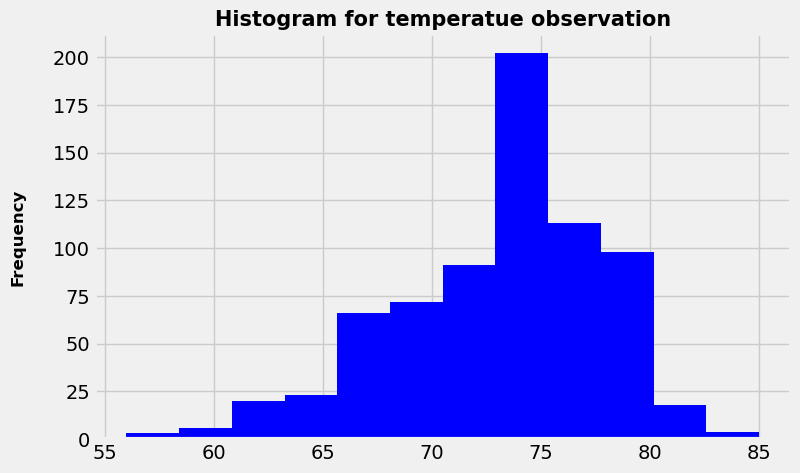

In [40]:
#plot
hist = df_results['tobs'].hist(bins=12,figsize=(8,5), color='b', zorder=2)

# Remove title
hist.set_title("Histogram for temperatue observation",weight='bold', size=15)

# Set y-axis label
hist.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

plt.show()


# Close Session

In [46]:
# Close Session
Session.close()